## Laboratorio 5

### Parte 1 - Análisis de paquetes

Maria Ines Vasquez Figueroa 18250

Diana Ximena de León Figueroa 18607

In [1]:
from scapy.all import *
import pandas as pd
import numpy as np
import binascii
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

from scapy.layers.l2 import Ether
from scapy.layers.inet import IP
from scapy.layers.inet import TCP, UDP

In [2]:
pcap_file = rdpcap('analisis_paquetes.pcap')

In [3]:
num_of_packets_to_sniff = 100
pcap_scan = sniff(count=num_of_packets_to_sniff)

In [4]:
for packet in pcap_file:
    print(packet.src)

88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
88:e9:fe:6a:92:52
80:37:73:96:9b:db
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:9

In [5]:
ethernet_frame = pcap_file[0]
ip_packet = ethernet_frame.payload
segment = ip_packet.payload
data = segment.payload #recupera la informacion de la capa 4

print("Informacion del frame:")
print(ethernet_frame.summary())

print("Informacion del paquete:")
print(ip_packet.summary())

print("Informacion del segmento:")
print(segment.summary())

print("Data:")
print(data.summary())

ethernet_frame.show()
data.show()

Informacion del frame:
Ether / IP / UDP / DNS Qry "b'google.com.'"  / Raw
Informacion del paquete:
IP / UDP / DNS Qry "b'google.com.'"  / Raw
Informacion del segmento:
UDP / DNS Qry "b'google.com.'"  / Raw
Data:
DNS Qry "b'google.com.'"  / Raw
###[ Ethernet ]### 
  dst       = 80:37:73:96:9b:db
  src       = 88:e9:fe:6a:92:52
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 961
     id        = 1
     flags     = 
     frag      = 0
     ttl       = 64
     proto     = udp
     chksum    = 0x52e6
     src       = 10.1.10.53
     dst       = 84.54.22.33
     \options   \
###[ UDP ]### 
        sport     = domain
        dport     = domain
        len       = 941
        chksum    = 0xf60e
###[ DNS ]### 
           id        = 12
           qr        = 0
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 1
           ra        = 0
           z         = 0
           ad        = 

In [6]:
print(type(ethernet_frame))
print(type(ip_packet))
print(type(segment))

ethernet_type = type(ethernet_frame)
ip_type = type(ip_packet)
tcp_type = type(segment)

print("Ethernet", pcap_file[ethernet_type])
print("IP", pcap_file[ip_type])
print("TCP", pcap_file[tcp_type])

print("UDP", pcap_file[UDP])

<class 'scapy.layers.l2.Ether'>
<class 'scapy.layers.inet.IP'>
<class 'scapy.layers.inet.UDP'>
Ethernet <Ether from analisis_paquetes.pcap: TCP:0 UDP:62 ICMP:0 Other:0>
IP <IP from analisis_paquetes.pcap: TCP:0 UDP:62 ICMP:0 Other:0>
TCP <UDP from analisis_paquetes.pcap: TCP:0 UDP:62 ICMP:0 Other:0>
UDP <UDP from analisis_paquetes.pcap: TCP:0 UDP:62 ICMP:0 Other:0>


In [7]:
def create_dataframe(pcap_packets):
    # Obtenemos los campos de IP/TCP/UDP que seran las columnas de nuestro DF
    ip_fields = [field.name for field in IP().fields_desc]
    tcp_fields = [field.name for field in TCP().fields_desc]
    udp_fields = [field.name for field in UDP().fields_desc]

    #Concatenamos todos los campos
    dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload', 'payload_raw', 'payload_hex']

    # Creamos un DF en blanco con los campos como columnas
    df = pd.DataFrame(columns=dataframe_fields)
    for packet in pcap_packets[IP]:
        # Obtenemos los valores de los campos de cada fila
        field_values = []
        # A;adimos todos los valores de los campos de IP al df
        for field in ip_fields:
            if field == 'options':
                # Obtenemos el numero de opciones del IP Header
                field_values.append(len(packet[IP].fields[field]))
            else:
                field_values.append(packet[IP].fields[field])

        field_values.append(packet.time)

        layer_type = type(packet[IP].payload)
        for field in tcp_fields:
            try:
                if field == 'options':
                    field_values.append(len(packet[layer_type].fields[field]))
                else:
                    field_values.append(packet[layer_type].fields[field])
            except:
                field_values.append(None)

        # Agregamos el payload
        field_values.append(len(packet[layer_type].payload))
        field_values.append(packet[layer_type].payload.original)
        field_values.append(binascii.hexlify(packet[layer_type].payload.original))
        # Agregamos la fila al df
        df_append = pd.DataFrame([field_values], columns=dataframe_fields)
        df = pd.concat([df, df_append], axis=0)

    # Reset Index
    df = df.reset_index()
    # Drop old index column
    df = df.drop(columns="index")
    
    return df

In [8]:
df_file = create_dataframe(pcap_file)

In [9]:
df_file.head(5)

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,961,1,,0,64,17,21222,...,None,None,None,None,62990,None,None,933,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
1,4,5,32,84,58919,,0,122,17,13836,...,None,None,None,None,65061,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
2,4,5,0,975,1,,0,64,17,21208,...,None,None,None,None,36378,None,None,947,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
3,4,5,32,84,59493,,0,122,17,13262,...,None,None,None,None,65063,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
4,4,5,0,1012,1,,0,64,17,21171,...,None,None,None,None,63846,None,None,984,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...


In [10]:
df_scan = create_dataframe(pcap_scan)

In [11]:
df_scan.head(5)

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,117,56201,DF,0,232,6,32674,...,5,0,FPA,114,39824,0,0,77,"b""\x17\x03\x03\x00)A\xfav\xc4\x89>a\xb3\xe5\xd...",b'170303002941fa76c4893e61b3e5d90db90799ce27d5...
1,4,5,0,832,50052,DF,0,128,6,48702,...,5,0,PA,512,20532,0,0,792,b'\x17\x03\x03\x03\x13\x18\xa8\x14\xc7n\x15j\x...,b'170303031318a814c76e156a90963abbb87c5a798f98...
2,4,5,0,229,50053,DF,0,128,6,49304,...,5,0,PA,512,28663,0,0,189,"b""\x17\x03\x03\x00\xb8Q\xcc\xb4\x110\x9d\xda+\...",b'17030300b851ccb411309dda2bca5e416fe02d859d0c...
3,4,5,0,1285,50054,DF,0,128,6,48247,...,5,0,PA,512,30193,0,0,1245,b'\x17\x03\x03\x04\xd8a\xf0\x0b\x99\x80F\x10\x...,b'17030304d861f00b99804610f6231d595eb161c91ddf...
4,4,5,0,40,21770,,0,119,6,30929,...,5,0,A,529,917,0,None,6,b'\x00\x00 ',b'000020202020'


In [12]:
df = pd.concat([df_file, df_scan], ignore_index = True)

In [13]:
# Src Address, Dst Address, Src Port, Dst Port
df[['src','dst','sport','dport']]

,src,dst,sport,dport
0,10.1.10.53,84.54.22.33,53,53
1,84.54.22.33,10.1.10.53,53,53
2,10.1.10.53,84.54.22.33,53,53
3,84.54.22.33,10.1.10.53,53,53
4,10.1.10.53,84.54.22.33,53,53
...,...,...,...,...
157,192.168.2.109,172.217.3.78,50172,443
158,192.168.2.109,172.217.3.78,50172,443
159,192.168.2.109,172.217.3.78,50172,443
160,192.168.2.109,172.217.3.78,50172,443


#### Estadísticas 

a. Muestre cual es la IP origen que más aparece 

In [14]:
frequent_src_address = df['src'].describe()['top']

print(frequent_src_address)

192.168.2.109


b. Muestre cual es la IP destino que más aparece 

In [15]:
frequent_dst_address = df['dst'].describe()['top']

print(frequent_dst_address)

192.168.2.109


c. ¿A qué IPs se comunica la IP del inciso a? 

In [16]:
print(df[df['src'] == frequent_src_address]['dst'].unique())

['142.251.35.228' '172.217.3.78' '142.250.64.174']


d. ¿A qué puertos destino se comunica la IP del inciso a? 

In [17]:
print(df[df['src'] == frequent_src_address]['dport'].unique())

[443]


e. ¿A qué puertos origen se comunica la IP del inciso a? 

In [18]:
print(df[df['src'] == frequent_src_address]['sport'].unique())

[50171 50172 61525]


f. ¿Para que se utiliza el puerto que más aparece en el inciso  d y e? 

#### Gráficas

a. Muestre una gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads 
enviados de dichas direcciones. 

<AxesSubplot:xlabel='src'>

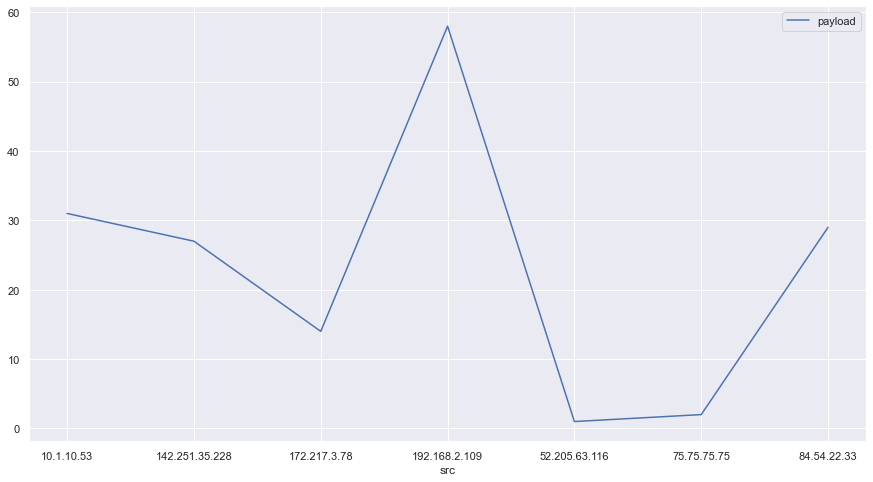

In [19]:
df.groupby('src').count()['payload'].plot(legend=True, figsize=(15, 8))

b. Muestre una gráfica 2D, en el eje Y las IPs destino, y en el eje X la suma de los payloads 
recibidos en dichas direcciones. 

<AxesSubplot:xlabel='dst'>

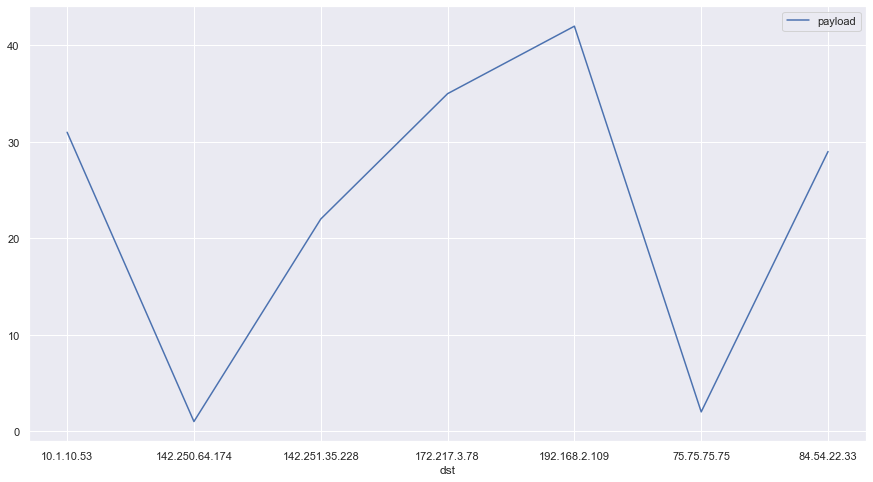

In [20]:
df.groupby('dst').count()['payload'].plot(legend=True, figsize=(15, 8))

c. Muestre una gráfica 2D, en el eje Y los puertos origen, y en el eje X la suma de los 
payloads enviados de dichos puertos. 

<AxesSubplot:xlabel='sport'>

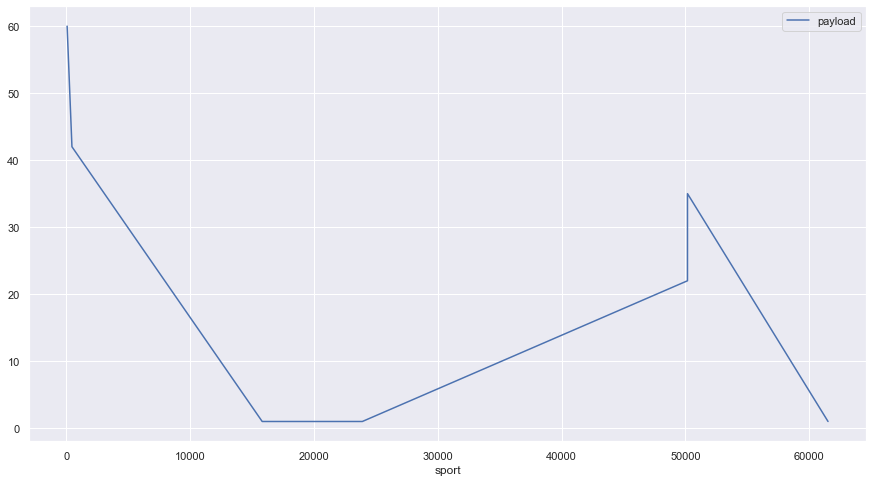

In [21]:
df.groupby('sport').count()['payload'].plot(legend=True, figsize=(15, 8))

d. Muestre una gráfica 2D, en el eje Y los puertos destino, y en el eje X la suma de los 
payloads recibidos en dichos puertos. 

<AxesSubplot:xlabel='dport'>

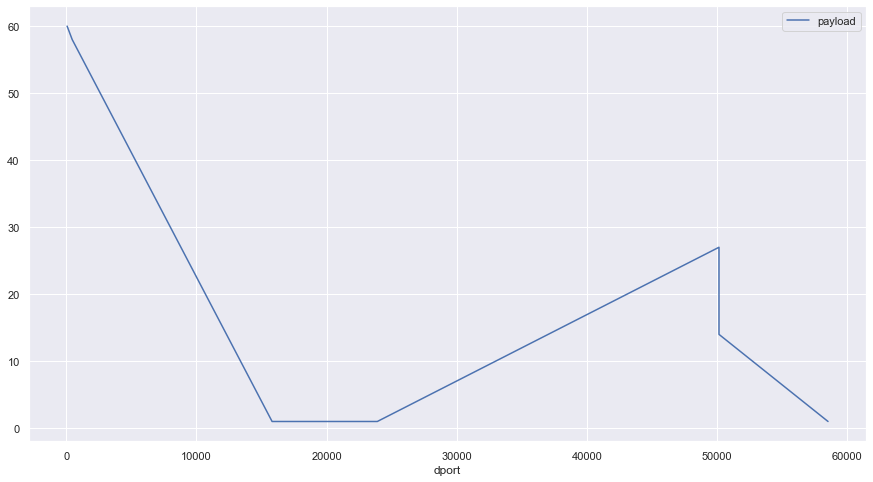

In [22]:
df.groupby('dport').count()['payload'].plot(legend=True, figsize=(15, 8))

#### Investigación del payload

a. Cree un nuevo DF que incluya únicamente la conversación de la dirección IP origen 
más frecuente 

In [25]:
df_src_frecuente = df[df['src'] == frequent_src_address]

df_src_frecuente.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
63,4,5,0,832,50052,DF,0,128,6,48702,...,5,0,PA,512,20532,0,0,792,b'\x17\x03\x03\x03\x13\x18\xa8\x14\xc7n\x15j\x...,b'170303031318a814c76e156a90963abbb87c5a798f98...
64,4,5,0,229,50053,DF,0,128,6,49304,...,5,0,PA,512,28663,0,0,189,"b""\x17\x03\x03\x00\xb8Q\xcc\xb4\x110\x9d\xda+\...",b'17030300b851ccb411309dda2bca5e416fe02d859d0c...
65,4,5,0,1285,50054,DF,0,128,6,48247,...,5,0,PA,512,30193,0,0,1245,b'\x17\x03\x03\x04\xd8a\xf0\x0b\x99\x80F\x10\x...,b'17030304d861f00b99804610f6231d595eb161c91ddf...
70,4,5,0,40,50055,DF,0,128,6,49491,...,5,0,A,510,64632,0,None,0,b'',b''
72,4,5,0,40,50056,DF,0,128,6,49490,...,5,0,A,513,63199,0,None,0,b'',b''


b. Obtenga un nuevo DF con las columnas Src Address, Dst Address y agrúpelas por 
payload 

In [28]:
df_payload = df_src_frecuente.groupby(by = ['payload'])

In [29]:
df_payload = df_payload[['src', 'dst', 'payload']]
df_payload.head()

,src,dst,payload
63,192.168.2.109,142.251.35.228,792
64,192.168.2.109,142.251.35.228,189
65,192.168.2.109,142.251.35.228,1245
70,192.168.2.109,142.251.35.228,0
72,192.168.2.109,142.251.35.228,0
74,192.168.2.109,142.251.35.228,0
76,192.168.2.109,142.251.35.228,0
79,192.168.2.109,142.251.35.228,0
82,192.168.2.109,172.217.3.78,324
85,192.168.2.109,172.217.3.78,1430


c. Obtenga la IP que más ha intercambiado bytes con la IP más frecuente.  Esta IP es 
sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.

In [38]:
max_payload = max(df_src_frecuente['payload'])

print(max_payload)

1430


In [44]:
suspicious = df_src_frecuente[df_src_frecuente['payload'] == max_payload]['dst'].unique()[0]

print(suspicious)

172.217.3.78


d. Cree un nuevo DF con la conversación entre la IP más frecuenta y la IP sospechosa. 

In [45]:
df_f_s = df[(df['src'] == frequent_src_address) & (df['dst'] == suspicious)]

In [46]:
df_f_s.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
82,4,5,0,364,40191,DF,0,128,6,59727,...,5,0,PA,511,37313,0,0,324,b'\x17\x03\x03\x01?\xa4\xe0|\xd8\x16D\x80\xbd\...,b'170303013fa4e07cd8164480bd10e73e791262d5edef...
85,4,5,0,1470,40192,DF,0,128,6,58620,...,5,0,A,511,59878,0,0,1430,b'\x17\x03\x03@\x11\xbc\xfa\xec\x06\xd9[~\x08;...,b'1703034011bcfaec06d95b7e083b297511b6e8cf8a2a...
86,4,5,0,1470,40193,DF,0,128,6,58619,...,5,0,A,511,46636,0,0,1430,b'\x8c\xc0\xe0JQ\x10\rw\x0e0\x92\xd8\n\xb9P/\x...,b'8cc0e04a51100d770e3092d80ab9502f8a459543b4d9...
87,4,5,0,1470,40194,DF,0,128,6,58618,...,5,0,A,511,64328,0,0,1430,b'\xbaGG\x858\x91\x03\x1c\xa3\xbd\xb5\x00\xee\...,b'ba4747853891031ca3bdb500eefc0eb123cd032b345e...
88,4,5,0,1470,40195,DF,0,128,6,58617,...,5,0,A,511,17786,0,0,1430,b'5\'\xec\x87\x15\xd7n\xaf\xf0\xb5\x9a\x115\xd...,b'3527ec8715d76eaff0b59a1135d202a588cdd176ac61...


e. Obtenga los payloads del DF del inciso 6, y añada cada uno en un array.

In [49]:
payload_array = df_f_s['payload_raw'].to_numpy()

f. Muestre el contenido del array. 

In [50]:
payload_array

array([b'\x17\x03\x03\x01?\xa4\xe0|\xd8\x16D\x80\xbd\x10\xe7>y\x12b\xd5\xed\xef\x15\xe1\'\x12T\xdb\x92=\x10\xe4M\x9dg\x87@\xe36\x8e?"\xa0(\xf0\xb2\xee\xad\x98\xe7\x0e\x1b\xcfN\xc7\xe9Y\x0cA\xb4\xa7\xbc\xd4Y<\xb5\x00\x11\xe8rO`\xd9C&\xce\xd3\xb3\r(\x0c\xd8\xf3|\xc0\xf2\xb2\xc8\xad\xd8\x9b\xcf\xa0,\xfe8\x07\xde4p!\xd9\x9f\xf0\x15`\xc3]\xbdn[\xac\xe0\xa6\xc2\x90\xa0\xc2L5\xb2\x9b;\x85\x9b:j\x08\x99\xdfUS\xccb\xb0\x07\x8c\x0f\xefT\xea\xeap\xf5&\xf4\x10F\x9aJ"\x15\xf5\xcb\x8d\xd2B\x8fH\xe4Z\x18\xd6Co\xcf\xf6\xac\xd2\x8a\xa7sz\x90\xcby\xdd\xcd\xdb\x96Zq\x03[\xf2\rR5\xb0\x98]\xdd\xa1\xa3\x06:\xe4\xc4\x9ch\xcbr\x1a\x98\xd6\x85\x1f\\\x7f2\xc0\xc1\x96\xb3:~\x0b\xdf\x1d`\xa7\xf9\xfd_\xff)\x00^H+N\xa3\x18\xc5\x81\x88\x1aDQ.\xca\xe2\xb8\x04:c\x18\x06\x95)=\xe1wc\xc1]\xbc\xfar\x8bi$\x99\xcd\x98\xb7j\x82\x8eQ\x0b\xf3(\xbc\xd0\xc7\xafM\xaf2>\x07\r\x17\x15\xf6a\xd1\xce\xd0\xc7\x0b\xb8\xe4\x05Dz^W>\xfa\x8a\x05\xb6Q\x07\x88\x94C\x87RB\x98\xbbe\x9f\xad\x98\xb8\xedc\x1f"\xa6',
       b'\x17\x03\x03@\x11\xb

g. Examine los primeros bytes del contenido

In [52]:
df_f_s[['payload', 'payload_raw', 'src', 'sport', 'dst', 'dport']]

,payload,payload_raw,src,sport,dst,dport
82,324,b'\x17\x03\x03\x01?\xa4\xe0|\xd8\x16D\x80\xbd\...,192.168.2.109,50172,172.217.3.78,443
85,1430,b'\x17\x03\x03@\x11\xbc\xfa\xec\x06\xd9[~\x08;...,192.168.2.109,50172,172.217.3.78,443
86,1430,b'\x8c\xc0\xe0JQ\x10\rw\x0e0\x92\xd8\n\xb9P/\x...,192.168.2.109,50172,172.217.3.78,443
87,1430,b'\xbaGG\x858\x91\x03\x1c\xa3\xbd\xb5\x00\xee\...,192.168.2.109,50172,172.217.3.78,443
88,1430,b'5\'\xec\x87\x15\xd7n\xaf\xf0\xb5\x9a\x115\xd...,192.168.2.109,50172,172.217.3.78,443
89,1430,b'f\x10\xdc\x9dc]\x04\xda\x01ag\xf9\x80\x0c\xd...,192.168.2.109,50172,172.217.3.78,443
90,1430,b'%k\x80\x12|\x06\xad\x1f\xd0\x05\xa5v;\x84\xe...,192.168.2.109,50172,172.217.3.78,443
91,1430,b':\x97\xa0x\x1f>[:\xdeX\xc3\xad\xd7+\xaaj\xd5...,192.168.2.109,50172,172.217.3.78,443
92,1430,b'O\x10\xe6\x83_\xca\'o(\xee\xe3P\xcb[\x83g\xd...,192.168.2.109,50172,172.217.3.78,443
93,1430,b'\xaf\xa5\x8d_w\xac.S\xcc\xc2\x0f\x90\xcf\xf4...,192.168.2.109,50172,172.217.3.78,443


¿encuentra algún dato que no haga sentido que se envie a través del puerto explicado en el inciso f? 

In [23]:
df.to_csv('pcap_final.csv', index = False)